# Contexto del proyecto

Es sabido que las enfermedades cardiovasculares son la que, probablemente, más muertes causan en todo el mundo. Se estima que aproximadamente un 30% de las muertes son a causa de este tipo de enfermedades, y por lo general sucede en personas menores de 70 años.

En este dataset, contaremos 11 variables que serán de utilidad para poder predecir si la persona posiblemente tiene o no una enfermedad cardiovascular.

Las variables son la siguentes:

* Age: edad del paciente [años]
* Sex: sexo del paciente [M: Masculino, F: Femenino]
* ChestPainType: tipo de dolor de pecho [TA: Angina Típica, ATA: Angina atípica, NAP: Dolor no anginoso, ASY: Asintomática]
* RestingBP: presión arterial en reposo [mm Hg]
* Cholesterol: colesterol sérico [mm/dl]
*FastingBS: glucemia en ayunas [1: if FastingBS > 120 mg/dl, 0: caso contrario]
*RestingECG: resultados de electrocardiograma en reposo [Normal: Normal, ST: con anomalías en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), LVH: hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
* MaxHR: frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
*ExerciseAngina: angina inducida por ejercicio [Y: Si, N: No]
*Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
* ST_Slope: la pendiente del segmento ST de ejercicio máximo [Up: pendiente ascendente, Flat: plano, Down: pendiente descendente]
* HeartDisease: clase de salida [1: cardiopatía , 0: Normal]

El principal motivo de este proyecto es poder brindar el análisis realizado a profesionales de la salud, para que éstos puedan utilizarlo como una herramienta y ser asistidos a la hora de tomar una decisión. De modo que a partir del trabajo propuesta, sea más sencilla la tardea de diagnosticar a un paciente.

## Preguntas de interés

Finalizando el proyecto, hay dos cuestiones que serán clave:

* De los modelos trabajados ¿cuál fue el mas eficiente?
* ¿cuáles son las variables del dataset más significantes para la predicción?

# Importación de librerías necesarias para el proyecto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
!pip install scikit-plot
import scikitplot as skplt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import probplot
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.inspection import permutation_importance

# Información del dataset

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_original.csv')
df.head()

Mounted at /content/drive/


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Tamaño del dataset
print('El dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

El dataset tiene 1268 filas, y 12 columnas


In [ ]:
# Verifica si hay filas duplicadas en el dataset
duplicados = df.duplicated()

# Imprime la cantidad de filas duplicadas
print("Cantidad de filas duplicadas:", duplicados.sum())

Cantidad de filas duplicadas: 0


In [ ]:
# Veamos un poco más de información
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1268.0,53.282334,11.397009,25.0,46.0,54.0,61.0,79.0
RestingBP,1268.0,132.108833,18.009490,0.0,120.0,130.0,140.0,200.0
Cholesterol,1268.0,212.899842,105.758904,0.0,175.0,227.5,277.0,603.0
FastingBS,1268.0,0.235804,0.424668,0.0,0.0,0.0,0.0,1.0
MaxHR,1268.0,137.620662,25.372156,60.0,120.0,140.0,157.0,202.0
Oldpeak,1268.0,0.882571,1.069534,-2.6,0.0,0.5,1.5,6.2
HeartDisease,1268.0,0.541009,0.498512,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Busquemos valores nulos en las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1268 non-null   int64  
 1   Sex             1268 non-null   object 
 2   ChestPainType   1268 non-null   object 
 3   RestingBP       1268 non-null   int64  
 4   Cholesterol     1268 non-null   int64  
 5   FastingBS       1268 non-null   int64  
 6   RestingECG      1268 non-null   object 
 7   MaxHR           1268 non-null   int64  
 8   ExerciseAngina  1268 non-null   object 
 9   Oldpeak         1268 non-null   float64
 10  ST_Slope        1268 non-null   object 
 11  HeartDisease    1268 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 119.0+ KB


El dataset no posee valores nulos.

In [ ]:
# veamos que cantidad de personas de cada sexo hay registradas
df['Sex'].value_counts()

M    890
F    378
Name: Sex, dtype: int64

In [ ]:
# veamos cuantos casos positivos (1) y negativos (0) hay registrados
df['HeartDisease'].value_counts()

1    686
0    582
Name: HeartDisease, dtype: int64

Uno de los fines de este proyecto será poder predecir si la persona tiene o tendrá una enfermedad del corazón. En este caso la variable que queremos predecir es ``HeartDisease``.
A fines prácticas y para evitar confusiones, cambiaremos el nombre de la variable a ``Outcome``.

In [ ]:
df.HeartDisease = df.rename({'HeartDisease':'Outcome'},inplace = True,axis =1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Wrangling y Exploratory Data Analysis.

En la etapa de Data Wrangling, justamente, haremos la preparación de los datos. En este proceso se hara una limpieza, transformación y preparación de los datos para un futuro análisis. Esto incluye: eliminación de datos duplicados, transformación del tipo de dato a uno adecuado si así se requiere, detección y eleminación de valor atípicos (outliers), y otros procesos.

La etapa de EDA, abarca la exploración y la comprensión de los datos para obtener información. Esto incluye la visualización de datos utilizando gráficos y tablas para identificar patrones, tendencias, valores atípicos y relaciones entre variables. El objetivo del EDA es obtener una comprensión profunda de los datos antes de realizar el análisis estadístico o modelización.

## DW (Data Wrangling)

El proceso de Data Wrangling estará compuesto, en aspectos generales, a la limpieza y preparación de datos. Es decir: detección y eleminación de valores atípicos, eliminación de valores duplicados, transformar los tipos de datos a uno adecuado, normalización de variables, etc.

Dejemos el df con el dataset original, y hagamos una copia del df en el cual haremos dichos procesos.

In [ ]:
df_copy = df.copy(deep = True)

### Distribución de las variables y eliminación de outiliers

In [ ]:
df_copy.Cholesterol.value_counts(dropna=False)

0      172
211     12
220     12
254     11
263     11
      ... 
321      1
529      1
409      1
156      1
372      1
Name: Cholesterol, Length: 286, dtype: int64

Parece ser que la variable Cholesterol contiene muchos registros nulos (aunque antes no lo pudimos ver cuando usamos .info()), vemos qué porcentaje abarcan, de modo de saber cómo tratar estos valores.

Es decir que de los 1268 registros, 172 son nulos, es decir: aproximadamente 13,56% de los registros son nulos.

A fin de mantener un dataset con suficientes registros, no los eliminaremos.

Para la eliminación de valores atípicos, previamente tenemos que analizar la distribución de los datos, por ejemplo haciendo uso de tests estadísticos (como podría ser el de Shapiro-Wilk). Según si la distribución sea normal o no usaremos distintos métodos para eliminar los outliers.

En caso que sea normal usaremos **z-scores**. Si no es normal **IQR (rango intercuartil)**.

In [ ]:
# Creemos una función para aplicar el test de Shapiro-Wilk, con la librería scipy
#si el resultado del test es mayor a 0.5 no se puede rechazar la hipotesis nula (la distribución es normal)
#en caso contrario, se rechaza la hipótesis (no sigue distribución normal)
def shapiro_wilk_test(data, alpha=0.5):
    stat, p = shapiro(data)
    if p > alpha:
        print('No se puede rechazar la hipótesis nula (los datos siguen una distribución normal)')
    else:
        print('Se rechaza la hipótesis nula (los datos no siguen una distribución normal)')

#### Age

In [ ]:
shapiro_wilk_test(df_copy['Age'],alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


Como la distribución no es normal, debemos usar el test de IQR.

In [ ]:
Q1 = df_copy['Age'].quantile(.25)
Q3 = df_copy['Age'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(23.5, 83.5)

In [ ]:
df_copy['Age'].min()

25

In [ ]:
df_copy = df_copy[(df['Age'] >= df_copy['Age'].min()) & (df_copy['Age'] < limitesup)] #usamos el min() porque el limite inferior es menor que el minimo

In [ ]:
df_copy.shape

(1268, 12)

No se han encontrado, y por lo tanto eliminado, valores atípicos.

#### RestingBP

In [ ]:
shapiro_wilk_test(df_copy['RestingBP'], alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


In [ ]:
Q1 = df_copy['RestingBP'].quantile(.25)
Q3 = df_copy['RestingBP'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(90.0, 170.0)

In [ ]:
df_copy['RestingBP'].min()

0

In [ ]:
df_copy = df_copy[(df['RestingBP'] >= limiteinf) & (df_copy['RestingBP'] < limitesup)]

In [ ]:
df_copy.shape

(1217, 12)

En esta ocasión se han elimiando aproximadamente 50 registros.

#### Cholesterol

In [ ]:
shapiro_wilk_test(df_copy['Cholesterol'], alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


In [ ]:
Q1 = df_copy['Cholesterol'].quantile(.25)
Q3 = df_copy['Cholesterol'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(23.5, 427.5)

In [ ]:
df_copy['Cholesterol'].min()

0

In [ ]:
df_copy = df_copy[(df['Cholesterol'] >= df_copy['Cholesterol'].min()) & (df_copy['Cholesterol'] < limitesup)]

<ipython-input-318-31ee1dd9187d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df['Cholesterol'] >= df_copy['Cholesterol'].min()) & (df_copy['Cholesterol'] < limitesup)]


In [ ]:
df_copy.shape

(1209, 12)

Se eliminaron 8 valores atípicos.

#### MaxHR

In [ ]:
shapiro_wilk_test(df['MaxHR'],alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


Corresponde usar el método IQR.

In [ ]:
Q1 = df_copy['MaxHR'].quantile(.25)
Q3 = df_copy['MaxHR'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(63.0, 215.0)

In [ ]:
df_copy['MaxHR'].min()

60

In [ ]:
df_copy = df_copy[(df['MaxHR'] >= limiteinf) & (df_copy['MaxHR'] < limitesup)]

<ipython-input-323-8b44d524cda8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df['MaxHR'] >= limiteinf) & (df_copy['MaxHR'] < limitesup)]


In [ ]:
df_copy.shape

(1208, 12)

Se eliminó 1 registro.

## EDA (Análisis exploratorio de datos)

In [ ]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


* Lo que haremos en esta primera etapa, será realizar visualizaciones de las variables que disponemos a fin de obtener infomración de las mismas.
De manera general, generaremos visualizaciones de cada variable en relación a las variables ``Sex``, ``Age`` y ``Outcome``, para entender justamente como se comportan segun los sexos, rango etario, y para qué valores fue más frecuente un diagnóstico de cardiopatía.

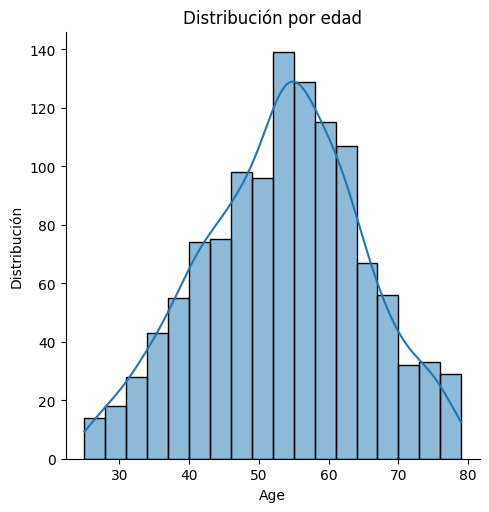

In [ ]:
# Veamos en que rango de edades se encuentras las personas
sns.displot(x=df_copy['Age'], kde=True).set(ylabel= 'Distribución',title='Distribución por edad')

[Text(0.5, 1.0, 'Age vs Target')]

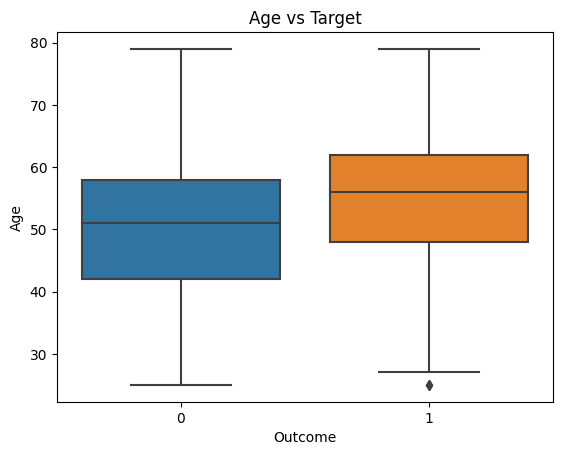

In [ ]:
sns.boxplot(x =df_copy["Outcome"], y = df_copy["Age"]).set(title='Age vs Target')

[Text(0, 0.5, 'Sexo'), Text(0.5, 1.0, 'Edad según sexo')]

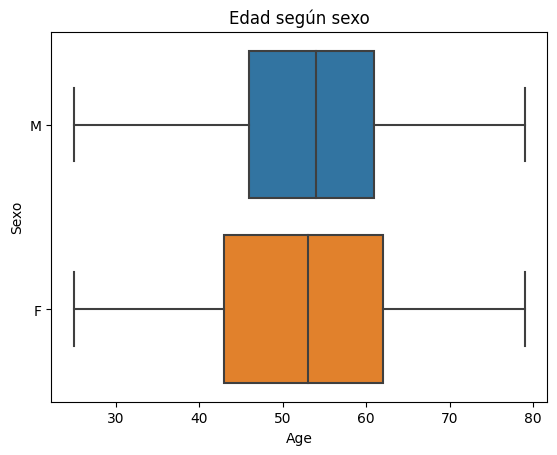

In [ ]:
sns.boxplot(x =df_copy["Age"], y = df_copy["Sex"]).set(ylabel= 'Sexo', title='Edad según sexo')

La distribución parece ser aproximadamente normal. En el boxplot podemos ver que las "cajas" abarcan casi el mismo rango de edades, con la diferencia que el de las mujeres comienza a una edad más temprana.

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'Sex vs. Target')]

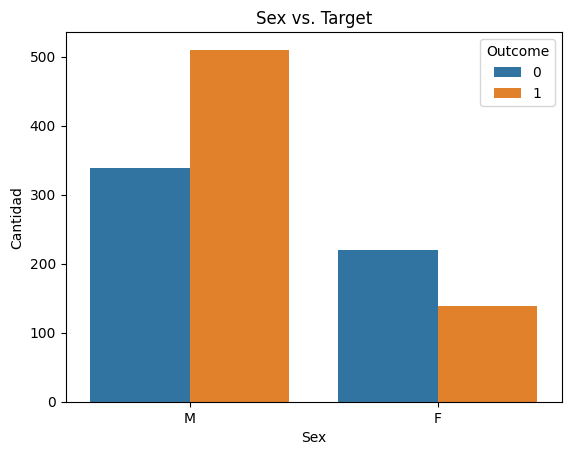

In [ ]:
sns.countplot(x=df_copy['Sex'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='Sex vs. Target')

[Text(0, 0.5, 'Sexo'), Text(0.5, 1.0, 'Colesterol según sexo')]

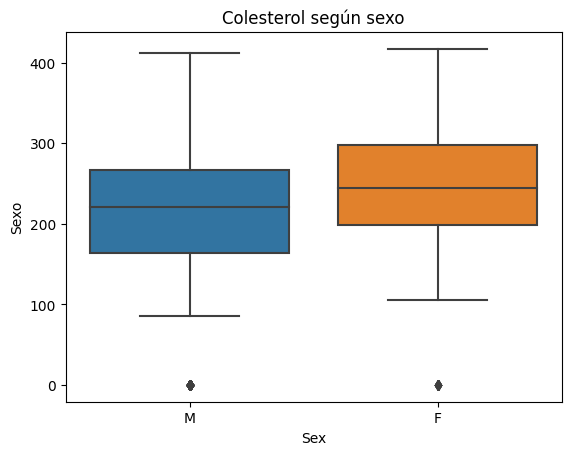

In [ ]:
sns.boxplot(y =df_copy["Cholesterol"], x = df_copy["Sex"]).set(ylabel= 'Sexo', title='Colesterol según sexo')

In [ ]:
df_copy['Cholesterol'].quantile(0.25)

174.0

In [ ]:
df_copy['Cholesterol'].quantile(0.75)

275.0

[Text(0.5, 1.0, 'Cholesterol vs Target')]

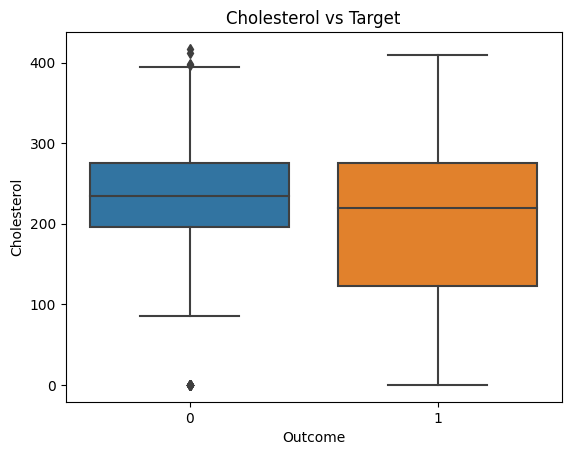

In [ ]:
sns.boxplot(x=df_copy['Outcome'], y=df_copy['Cholesterol']).set(title= "Cholesterol vs Target")

Aquí podemos ver que para los hombres, la caja del boxplot (entre el 25% y 75% de los datos) se ubican entre aproximadamente los valores de 174 y 275. Podemos ver una cantidad notable de valores atípicos, excediendo los 400 y llegando hasta 600.

En cambio en las mujeres tiene una distribución mas "pareja", entran mas valores dentro de la caja, y los bigotes del boxplot van hasta mas de 450. Detectando pocos outliers.

Es decir, comunmente las mujeres alcanzan valores más altos de colesterol, pero se han registrado valores mas altos para hombres.

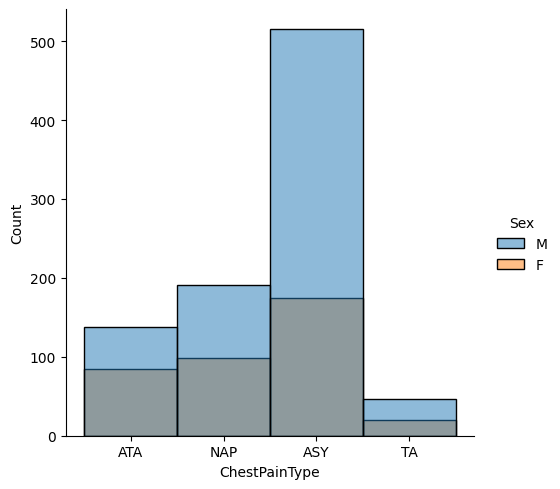

In [ ]:
# Veamos como es la distribución por sexo para los distintos dolores de pecho. Luego veremos la distribución por sexo en caso que tengan o no angina por ejercicio.

sns.displot(df_copy, x=df['ChestPainType'], hue = df['Sex'])

El patrón es similar para ambos sexos.

Se puede destacar que en el caso que no hay síntomas de dolor de pecho, se han registrado muchos más casos. En los 3 casos restantes de tipos de dolor, la distribución es pareja para cada uno de los casos.

[Text(0.5, 0, 'Tipo de dolor de pecho'),
 Text(0.5, 1.0, 'Distribución de MaxHR por tipo de dolor')]

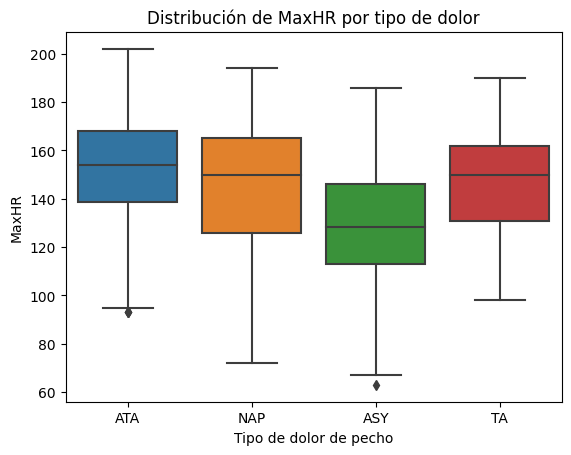

In [ ]:
# veamos si hay algun tipo de relacion entre el dolor de pecho y la frecuencia maxima
sns.boxplot(data=df_copy, x=df_copy['ChestPainType'], y=df_copy['MaxHR']).set(xlabel='Tipo de dolor de pecho', title='Distribución de MaxHR por tipo de dolor')

Los de menor frecuencia máxima son los de tipo asintomático.
Para los otros tres tipos de dolor (típica, atípica y no anginoso), presetan una media similar, siendo el caso "típico" en que se encuentra la caja con valores mas altos (entre Q1 y Q3), y para el casó atípico se registran los valores más altos.


[Text(0.5, 1.0, 'Distribución de "Dolor de pecho" vs "Target'),
 Text(0.5, 0, 'Dolor de pecho'),
 Text(0, 0.5, 'Cantidad')]

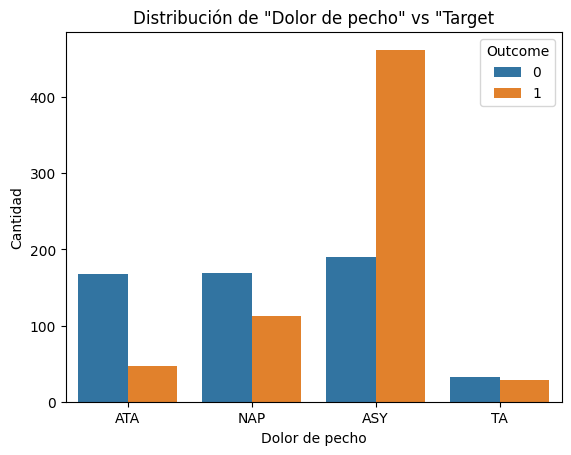

In [ ]:
# Veamos si las personas que tienen dolor de pecho, registraban 0 o 1 en la variable target

sns.countplot(data=df_copy, x =df_copy['ChestPainType'], hue = df_copy['Outcome']).set(title='Distribución de "Dolor de pecho" vs "Target', xlabel = 'Dolor de pecho', ylabel='Cantidad')

([<matplotlib.axis.XTick at 0x7a50efeb4910>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

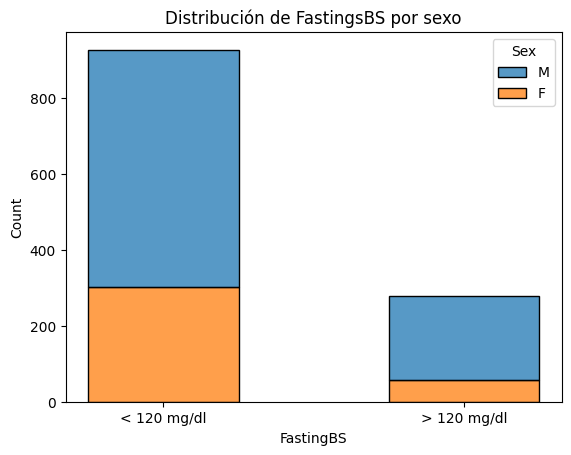

In [ ]:
# Análisis para FastingsBS. Veamos como se distribuye por sexo, por edad y su relación con la variable target
labels=['< 120 mg/dl', '> 120 mg/dl']
sns.histplot(x=df_copy['FastingBS'], hue=df_copy['Sex'], multiple='stack', discrete = True, shrink = 0.5).set(title='Distribución de FastingsBS por sexo')
plt.xticks([0,1],labels)


([<matplotlib.axis.XTick at 0x7a50efd20df0>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

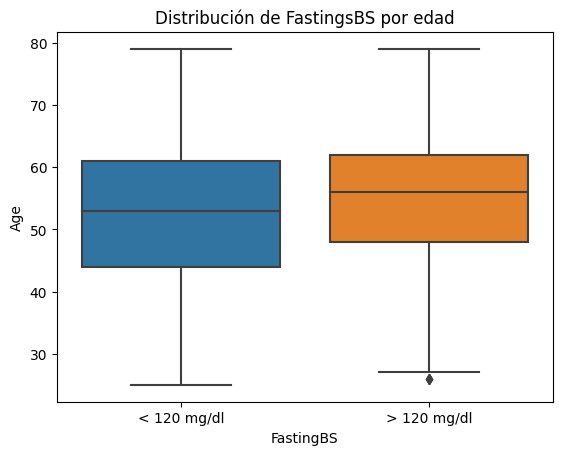

In [ ]:
labels=['< 120 mg/dl', '> 120 mg/dl']
sns.boxplot(x=df_copy['FastingBS'], y=df_copy['Age']).set(title='Distribución de FastingsBS por edad')
plt.xticks([0,1],labels)

([<matplotlib.axis.XTick at 0x7a50efdb8340>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

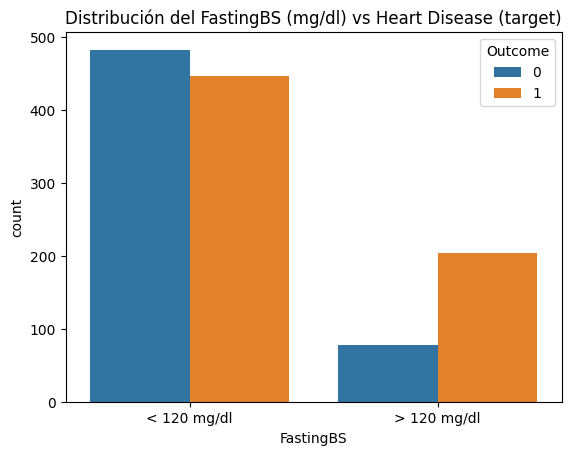

In [ ]:
sns.countplot(x =df_copy['FastingBS'], hue = df_copy['Outcome']).set(title='Distribución del FastingBS (mg/dl) vs Heart Disease (target)')
plt.xticks([0, 1],labels)

La acumulación para casos donde FastingsBS < 120 mg/dl es prácticamente igual si había o no cardiopatía. En cambio, si FastingsBS > 120 mg/dl la cantidad de casos en los que si había cardiopatía supera en casi el doble a los casos negativos.

[Text(0.5, 1.0, '"RestingECG" vs "Sexo'),
 Text(0.5, 0, 'Electrocardiograma en reposo'),
 Text(0, 0.5, 'Cantidad')]

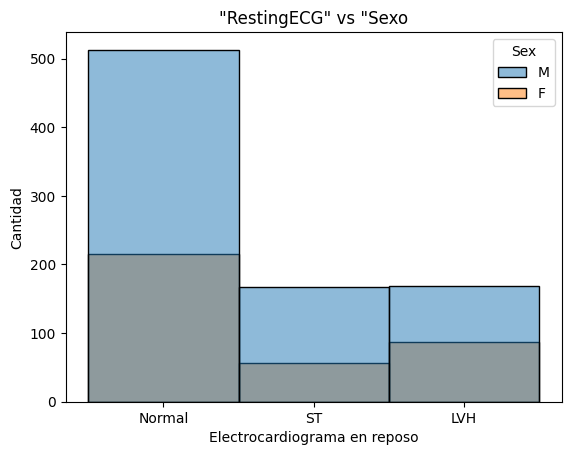

In [ ]:
# Comportamiento del electrocardiograma segun el sexo
sns.histplot(x =df_copy['RestingECG'], hue = df_copy['Sex']).set(title='"RestingECG" vs "Sexo', xlabel = 'Electrocardiograma en reposo', ylabel='Cantidad')

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'RestingECG vs. Target')]

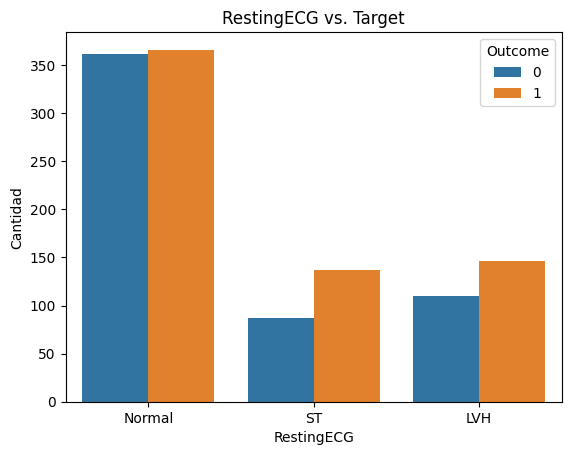

In [ ]:
sns.countplot(x=df_copy['RestingECG'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='RestingECG vs. Target')

[Text(0.5, 1.0, 'MaxHR según sexo')]

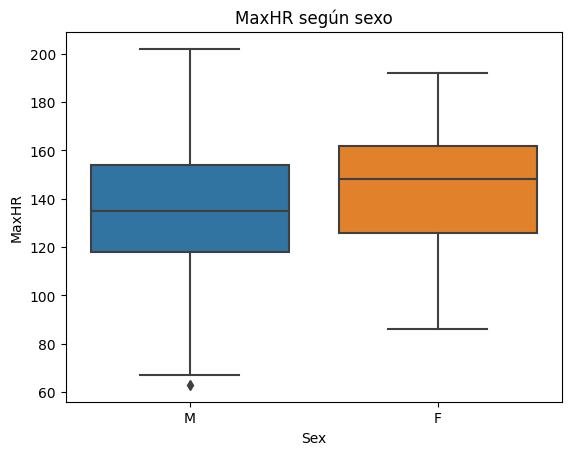

In [ ]:
# MaxHR por sexo
sns.boxplot(x=df_copy['Sex'], y=df_copy['MaxHR']).set(title= "MaxHR según sexo")

Tienen para ambos sexos una distribución similar, siendo el rango intercuartil de las mujeres apenas más elevado.

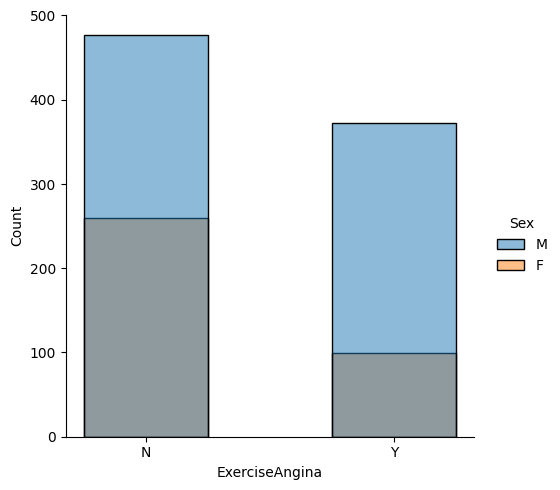

In [ ]:
#Angina inducida por ejercicio segun el sexo
sns.displot(df, x=df_copy['ExerciseAngina'], hue = df_copy['Sex'], shrink= 0.5)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

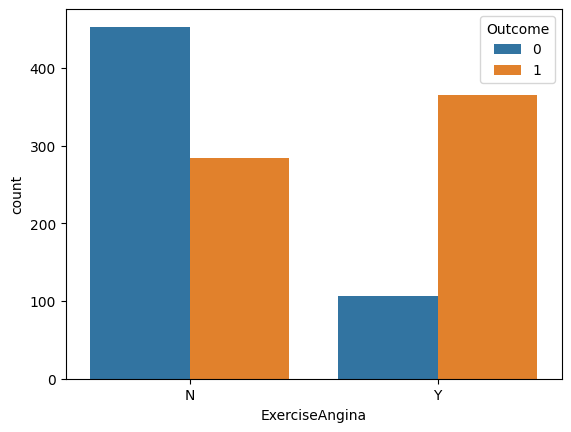

In [ ]:
sns.countplot(x=df_copy['ExerciseAngina'], hue = df_copy['Outcome'])

Es evidente que en los casos que si hubo angina inducida por ejercicio, la cantidad de casos en la que se registra una cardiopatía es aproximadamente el doble a los casos que no.

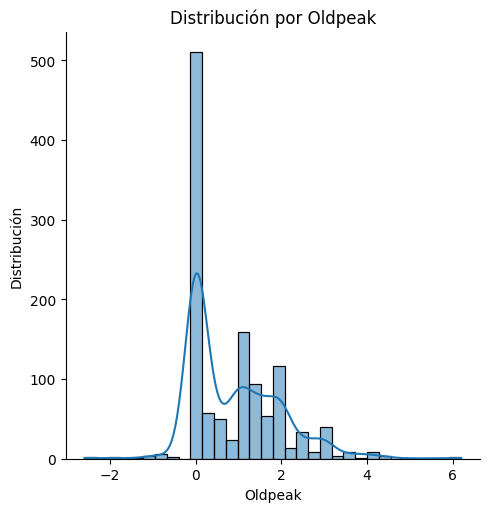

In [ ]:
# Veamos la distribución de la variable Oldpeak
sns.displot(data=df_copy, x='Oldpeak', kde=True).set(ylabel= 'Distribución',title='Distribución por Oldpeak')

<Axes: xlabel='ST_Slope', ylabel='Count'>

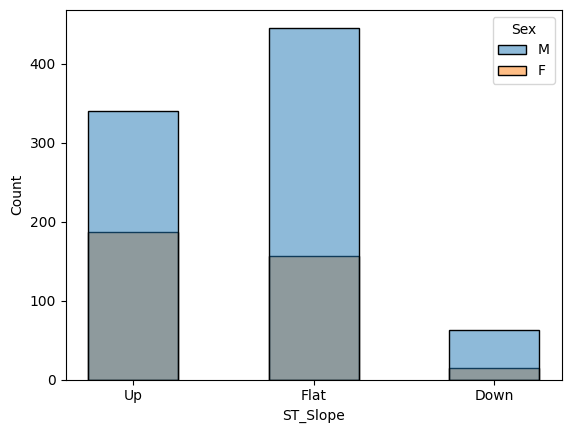

In [ ]:
# Veamos la distribución de Slope por sexo
sns.histplot(x=df_copy['ST_Slope'], hue=df_copy['Sex'], shrink = 0.5)

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'Distribución ST_Slope vs. Target')]

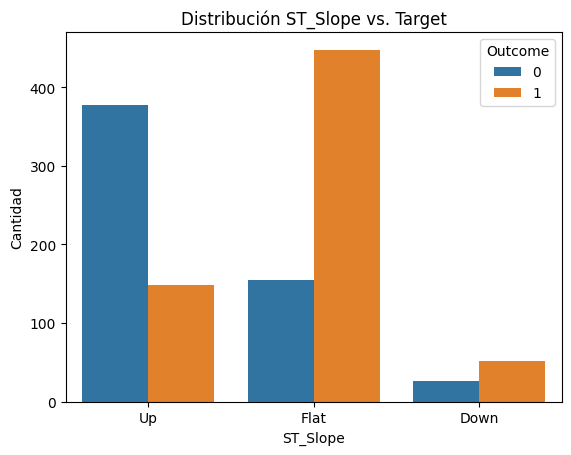

In [ ]:
# Relación entre ST_Slope y cardiopatía
sns.countplot(x=df_copy['ST_Slope'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='Distribución ST_Slope vs. Target')

Se registraron muchos más diagnósticos de cardiopatía en los casos en que Slope es Flat.

# Algoritmos de clasificación.

In [ ]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


El dataset se encuentra en "crudo", por lo que antes de poder aplicar los algoritmos de clasificación tenemos que poner a punto los datos. Sino, obtendremos resultados que no son correctos.

Para esto, tenemos que normalizar las variables. Como hicimos anteriormente, nos valdremos de dos métodos para esto: MinMaxScaler y StandardScaler.
Recordemos que en caso de que la distribución no sea normal, tendremos que aplicar MinMaxScaler, sino lo mejor sería usar StandardScaler.

Además, también tenemos que convertir las variables categóricas a numéricas haciando uso de algún encoder. (en este caso, será para: ``Sex``,  ``ChestPainType``, ``RestingECG``, ``ExerciseAngina`` y ``St_Slope``. Para ``Outcome`` lo hicimos previamente.

In [ ]:
le = LabelEncoder()
df_le = df_copy.copy(deep = True)

df_le['Sex'] = le.fit_transform(df_le['Sex'])
df_le['ChestPainType'] = le.fit_transform(df_le['ChestPainType'])
df_le['RestingECG'] = le.fit_transform(df_le['RestingECG'])
df_le['ExerciseAngina'] = le.fit_transform(df_le['ExerciseAngina'])
df_le['ST_Slope'] = le.fit_transform(df_le['ST_Slope'])

## Normalización de los datos

Ya habíamos visto anteriormente, utilizando la prueba de Shapiro-Wilk cuáles variables seguían una distribución normal.

En base a los resultados que arrojó el test para las variables Age, Oldpeak, RestingBP, Cholesterol y MaxHR ninguna seguía una distribución normal. Por lo que las normalizaremos utilizando MinMaxScaler.

In [ ]:
mms = MinMaxScaler()

df_le['Age'] = mms.fit_transform(df_le[['Age']])
df_le['RestingBP'] = mms.fit_transform(df_le[['RestingBP']])
df_le['Cholesterol'] = mms.fit_transform(df_le[['Cholesterol']])
df_le['MaxHR'] = mms.fit_transform(df_le[['MaxHR']])
df_le['Oldpeak'] = mms.fit_transform(df_le[['Oldpeak']])
df_le.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,0.277778,1,1,0.657534,0.693046,0,1,0.784173,0,0.295455,2,0
1,0.444444,0,2,0.931507,0.431655,0,1,0.669065,0,0.409091,1,1
2,0.222222,1,1,0.520548,0.678657,0,2,0.251799,0,0.295455,2,0
3,0.425926,0,0,0.630137,0.513189,0,1,0.323741,1,0.465909,1,1
4,0.537037,1,2,0.794521,0.467626,0,1,0.424460,0,0.295455,2,0


Veamos la correlación entre las variables, prestando particular atención en la correlación con Outcome.

<Axes: >

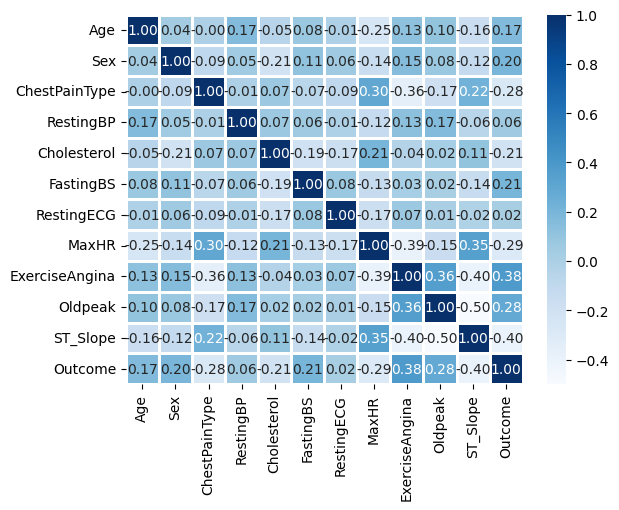

In [ ]:
sns.heatmap(df_le.corr(),fmt = ".2f",annot=True,lw=1,cmap = 'Blues')

In [ ]:
#Divido los datos en Train y Test

X = df_le.drop(columns = 'Outcome') # Train
y = df_le['Outcome']

In [ ]:
# Tomamos de manera aleatoria el 70% de los registros para Train y el 30% restante como Test.
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.7,random_state = 42,shuffle=True)

Es conveniente saber si las categorías de Target aparecen en cantidades similares (esto será crucial para enteder el resultado del accuracy o recall más adelante).


In [ ]:
y_train = y_train.ravel() # para poder pasarlo como argumento a cross_validate más adelante

In [ ]:
df_le['Outcome'].value_counts()

1    649
0    559
Name: Outcome, dtype: int64

## A tener en cuenta:

A partir de aquí nos centraremos en los dos modelos me quejores resultados arrojaron luego de los entrenamientos, los cuales fueron **SVC** y **Logistic Regression**.

Para profundizar en los detalles de cómo se obtuvieron los mejores hiperparámetros para cada modelo, referirse a las entregas que se hicieron durante el curso.
[Enlace al notebook usando durante el curso](https://colab.research.google.com/drive/1qRSEhW9dVk95OKnkpazQOoYW5sFR_9dz?usp=sharing)

En resumen el procedimiento fue el siguiente:
* Separamos los registros del dataset en un 70% de entrenamiento y un 30% de prueba.
* Entrenamos los modelos sin especificar parámetros, e hicimos predicciones sobre los dos conjuntos para así comparar las métricas estadísticas y ver cómo se ajusta a los datos cada modelo.
* Aplicamos validación cruzada.

  **Observación**: la métrica elegida fue 'recall', ya que fue la más significativa, y la tomaremos para la etiqueta 1 (positivo)
* Combinamos la validación cruzada con algun método de búsqueda de hiperparámetros (GridSearch o RandomizedSearch).
* Con los nuevos parámetros entrenamos nuevamente el modelo.
* Aplicamos nuevamente validación cruzada al modelo, pero con los mejores hiperparámetros.



## SVC (Support Vector Classifier)

In [ ]:
# Mejores parametros utilizando GridSearch:
# {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}

svc = SVC(C=1.0, gamma='scale', kernel='poly') #defino el modelo

#Definimos el método de validación cruzada, con 5 folds
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

#Entrenamos los datos. SVC con los mejores hiperparametros
svc.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_svc = svc.predict(X_test)

# Classification report para SVC, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_svc))

# Ahora para el conjunto de prueba
y_pred_train_svc = svc.predict(X_train)
print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_svc))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       159
           1       0.80      0.80      0.80       204

    accuracy                           0.77       363
   macro avg       0.77      0.77      0.77       363
weighted avg       0.77      0.77      0.77       363

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       400
           1       0.78      0.84      0.81       445

    accuracy                           0.79       845
   macro avg       0.79      0.79      0.79       845
weighted avg       0.79      0.79      0.79       845



Comparamos las métricas para cada conjunto.

In [ ]:
print("Recall para conjunto de entrenamiento", recall_score(y_train, y_pred_train_svc))
print("Recall para el conjunto de test", recall_score(y_test, y_test_pred_svc))

Recall para conjunto de entrenamiento 0.8382022471910112
Recall para el conjunto de test 0.7990196078431373


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

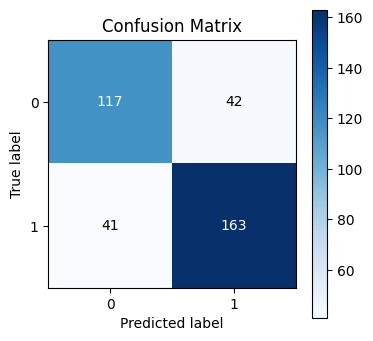

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_svc,figsize=(4,4))

Ahora aplicamos validación cruzada con SVC.

In [ ]:
# Aplicamos cross validation y ponemos True en train score para obtener las métricas (recall) para ambos conjuntos
cv_results_svc = cross_validate(svc, X_train, y_train, cv=stratified_kfold, scoring='recall', return_train_score=True)

# Calculamos el promedio del recall para los 5 folds
mean_train_score_svc = np.mean(cv_results_svc['train_score'])
mean_test_score_svc = np.mean(cv_results_svc['test_score'])

print(f"Mean Train Score: {mean_train_score}")
print(f"Mean Test Score: {mean_test_score}")

Mean Train Score: 0.7674157303370785
Mean Test Score: 0.7595505617977528


## Logistic Regression

In [ ]:
# Mejores parametros utilizando GridSearch:
# {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

lr = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg') #defino el modelo

#el método de validación cruzada ya fue definido anteriormente

#Entrenamos los datos. Logistic Regression con los mejores hiperparametros
lr.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_lr = lr.predict(X_test)

# Classification report para Logistic Regression, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_lr))

# Ahora para el conjunto de prueba
y_pred_train_lr = lr.predict(X_train)
print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_lr))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       159
           1       0.80      0.76      0.78       204

    accuracy                           0.76       363
   macro avg       0.75      0.76      0.76       363
weighted avg       0.76      0.76      0.76       363

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       400
           1       0.76      0.76      0.76       445

    accuracy                           0.75       845
   macro avg       0.74      0.74      0.74       845
weighted avg       0.75      0.75      0.75       845



Comparamos las métricas para cada conjunto.

In [ ]:
print("Recall para conjunto de entrenamiento", recall_score(y_train, y_pred_train_lr))
print("Recall para el conjunto de test", recall_score(y_test, y_test_pred_lr))

Recall para conjunto de entrenamiento 0.7617977528089888
Recall para el conjunto de test 0.7647058823529411


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

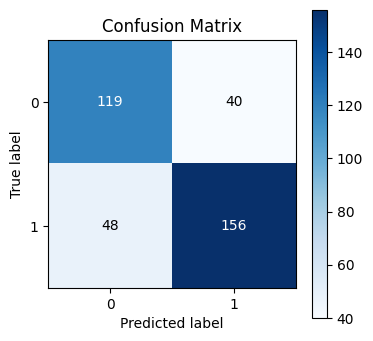

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_lr,figsize=(4,4))

Ahora aplicamos validacion cruzada con Logistic Regression

In [ ]:
# Aplicamos cross validation y ponemos True en train score para obtener las métricas (recall) para ambos conjuntos
cv_results_lr = cross_validate(lr, X_train, y_train, cv=stratified_kfold, scoring='recall', return_train_score=True)

# Calculamos el promedio del recall para los 5 folds
mean_train_score_lr = np.mean(cv_results_lr['train_score'])
mean_test_score_lr = np.mean(cv_results_lr['test_score'])

print(f"Mean Train Score: {mean_train_score_lr}")
print(f"Mean Test Score: {mean_test_score_lr}")

Mean Train Score: 0.7674157303370785
Mean Test Score: 0.7595505617977528


# Conclusiones

Como mencionamos previamente, hemos centrado nuestro análisis en base a la métrica **recall**. Dicha métrica es la proporción de veces que el modelo predijo una etiqueta y efectivamente era ese resultado.

De los dos modelos que hemos presentado aquí es evidente que el que mejores resultados arrojó fue SVC, con valores cercanos al 80% tanto para el conjunto de entrenamiento como para el de prueba.

Ahora, que ya hemos identificado el modelo más efectivo de los que hemos propuesto. Queremos ver cuáles son las variables más influyentes. Es decir, cuáles son las que marcan la diferencia para hacer que el modelo sea bueno o no.

Como el modelo no es lineal, tenemos que buscar otra manera de determinar la importancia de las variables.

Para esto, usaremos de la librería sklearn la función permutation_imporante. Ésta es una técnica de inspección del modelo, muy útil cuando el modelo no es lineal, y se basa en permutar los datos de cada variable reorganizándolos de manera aleatoria, para luego ver cómo afecta esto al modelo. Luego, nos indica el orden de importancia de las variables para el modelo.

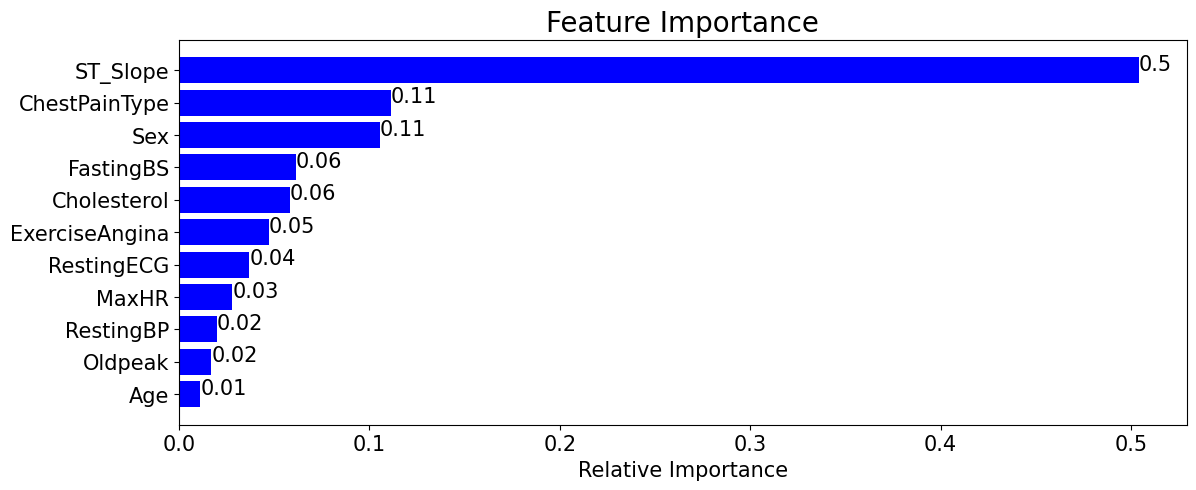

In [ ]:
perm_importance = permutation_importance(svc, X_train, y_train)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X_train.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)

plt.show()

El método seleccionó como las variables más importantes a ``ST_Slope``, ``ChestPainType`` y ``Sex``. Lo cual tiene bastante sentido, porque si regresamos al momento de EDA y las visualizaciones que hemos hecho, vimos que por ejemplo para la variable ``Sex`` los hombres eran más propensos a teneer cardiopatías. Y tanto para ``ST_Slope`` como para ``ChestPainType``, dependiendo la categoría de estas variables, era mucha la diferencia de casos positivios entre una de las categorías y el resto. Por lo que si una persona tenía dicha característca, muy probablemente tenga una cardiopatía.